# Tanzanian Ministry of Water Dataset Analysis

**Imported libraries**

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.feature_selection import SelectKBest, f_regression

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

**Loading in the datasets**

In [37]:
y_train = pd.read_csv('data/dependent_vars.csv')
X_train = pd.read_csv('data/independent_vars.csv')
X_test_final = pd.read_csv('data/independent_test.csv')
SF = pd.read_csv('data/SubmissionFormat.csv')

# Creating on single dataframe to work with
df = X_train.merge(y_train, on='id')

### Initial Data Exploration

**Numeric Features**
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- gps_height - Altitude of the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- num_private -
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- population - Population around the well
- construction_year - Year the waterpoint was constructed


**Categorical Features**
- funder - Who funded the well
- installer - Organization that installed the well
- wpt_name - Name of the waterpoint if there is one
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- lga - Geographic location
- ward - Geographic location
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


**Target**

- status_group - If the waterpump is functional/ non-functional/ functional needs repair

**Shape of Dataframe**

(59400, 41)



In [38]:
pd.set_option('display.max_columns', None)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Bulk Analysis on Features

For this specific analysis each feature was quickly looked at and compared to other features. The purpose of this analysis is to remove redundent columns, columns with large amounts of missing values, columns that have little value to predicting our target, and to decreace the datas high dimentionality. This analysis was done in part by using SelectKBest using f_regression for statistical significance comparison.

### Extraction Type

**Similar Features:** extraction_type, extraction_type_group, extraction_type_class

All features closely describing the same thing. extraction_type and extraction_type_group have a lot of extra values with low value counts. extraction_type_class is the most well balanced and cleanest feature

Dropping Features: extraction_type, extraction_type_group

### Waterpoint Type

**Similar Features:** waterpoint_type, waterpoint_type_group

Both features are very similare when comparing value_counts the diffence is waterpoint_type takes 6103 values from the communal standpip and calls them communal standpipe multiple. which given the unbalanced value count that communal standpipe already has could provid for better modeling predictions. 

Dropping Features: waterpoint_type_group

### Source

**Similar Features:** source, source_type, source_class

we are trying to generalize and reduce dimentionality. even thought the skbest gave source a slightly higher importance using source_class will add with dimentionality reduction. arguably each kind of model we use can handel dimentions and diffrent types of encoders in diffrent ways. One could quite honestly take the time to calculate every method of processing data with every type of encoder with every type of model and do every type of statistical and baysien test. However that takes significat amounts of time and we have to prioratize given what the goal is.

Dropping Features: source, source_type

### Quanity

**Similar Features:** quantity, quantity_group

both features have the exact same value counts

Dropping Features: quanity_group

### Water Quality

**Similar Features:** water_quality, quality_group

quality group prefermed slightly better in feature imortance also has less categories to work with. both are mostly identical

Dropping Features: water_quality

### Payment

**Similar Features:** payment, payment_type

both features are identicle 
Dropping Features: payment_type

### Managment

**Similar Features:** management, management_group

should combine unkown with other

both are similar but management_group is much more general both are inbalanced...

Dropping Features: management

### Region

**Similar Features:** region, region_code, district_code

district code is too unbalacned, region code preformed the best in SKbest.

Dropping Features: region, distric_code

### Num_private

**Similar Features:** num_private

majorit of values is just 0.

Dropping Features: Num_private

### wpt_name

**Similar Features:** wpt_name

has 37,400 diffrent categories the highest is labeld as none and is only 3563 observations

Dropping Features: wpt_name

### lga	ward

**Similar Features:** lga, ward

ward has 2092 diffrent categories lga has 125. lga will be generilze better ward has a lot of 1 value count categries

Dropping Features: ward

### recorded_by

**Similar Features:** recorded_by

its all the same entry. dropping...

Dropping Features: recorded_by

### basin

**Similar Features:** basin

well balanced. lots of 9 catagories

### There were also columns with missing values that were looked at more deeply

funder, installer, subvillage, public_meeting, scheme_management, permit

funder, installer, subvillage, all had too high of value counts for what we work looking for. scheme_management and scheme_name are both missing too many values and are similar the the other managment features.

It is work saving public_meeting and permit

Dropping Features: funder, installer, subvillage, scheme_management, scheme_name

### Dropping columns from inital feature analysis

In [39]:
df.drop(['extraction_type', 'extraction_type_group'], axis=1, inplace=True)
df.drop('waterpoint_type_group', axis=1, inplace=True)
df.drop(['source', 'source_type'], axis=1, inplace=True)
df.drop('quantity_group', axis=1, inplace=True)
df.drop('water_quality', axis=1, inplace=True)
df.drop('payment_type', axis=1, inplace=True)
df.drop('management', axis=1, inplace=True)
df.drop(['region', 'district_code'], axis=1, inplace=True)
df.drop('num_private', axis=1, inplace=True)
df.drop('wpt_name', axis=1, inplace=True)
df.drop('ward', axis=1, inplace=True)
df.drop('recorded_by', axis=1, inplace=True)

# initial Nan value features
df.drop(['funder'], axis=1, inplace=True)
df.drop(['installer'], axis=1, inplace=True)
df.drop(['subvillage'], axis=1, inplace=True)
df.drop(['scheme_management'], axis=1, inplace=True)
df.drop(['scheme_name'], axis=1, inplace=True)

### Droping columns with majority nan values

- dropping scheme_name due to majority nans
- dropping columns instead of rows has a huge effect on the top performing features
- could still be values equivilant to nans hidden in other columns

on a timelimit. going to drop columns with missing values. we potentially lose valuable information but its better then dropping rows since that would result in the loss of 30,000 observations also we already have a large dimentionality problem meaning we already have too many features for the kind of general models we are hoping to train with this dataset

### Observing the Nan values in the dataset

### Indepth look for nan equivilant values in remaining dataset features

- looking at value counts of each feature.
- looking for 0 values, unknowns, others

- amount_tsh - 41,639 observations are labeled as zero. zero could be a mix of water pumps that actually don't have water or unkown (highlyinbalanced)
- date_recorded - seems fine
- gps_height - 20438 ovservations are labled as zero (highly inbalanced)
- longitude - 1812 observatoins labed as zero (highly invalanced)
- latitude - 1812 obersations labed as -2.000000e-08 (highly inbalacned)
- basin - no missing values (categorical 9 cats)
- region_code - no missing values 
- lga - no missing values (categorical 125 cats)
- population - 21381 obsevations labeld as 0 (pretty highly inbalanced)
- public_meeting - 3334 observations Nan (categorical 2 cats)
- permit - 3056 observations Nan (categorical 2 cats)
- construction_year - 20709 labed as 0 (higly inbalanced)
- extraction_type_class - 6430 labeld as other (categorical 7 cats)
- managment_group - 943 labeld as other, 561 labeled as unknown (categorical 5 cats)
- payment - 1054 labeled as other, 8157 labeld as unknown (categorical 7 cats)
- quality_group - 1876 labeld as unknown (categorical 6 cats)
- quantity - 789 labeled as unknown (categorical 5 cats)
- source_class - 278 labeld as unknown (categorical 3 cats)
- waterpoint_type - 6380 labeld as other (categorical 7 cats)
- status_group - no missing values

not goingto claim other as a missing value

using knnimpute for filling in numeric data
use iterativeimpute for cat data

simpleinpute
knnimpute
iterativeimpute

**Revealing the Nan values**

In [40]:
# revealing the nan values
df.replace(0, np.nan, inplace=True)
df.replace(-2.000000e-08, np.nan, inplace=True)
df.replace('unknown', np.nan, inplace=True)

**Graving the Nan Values**

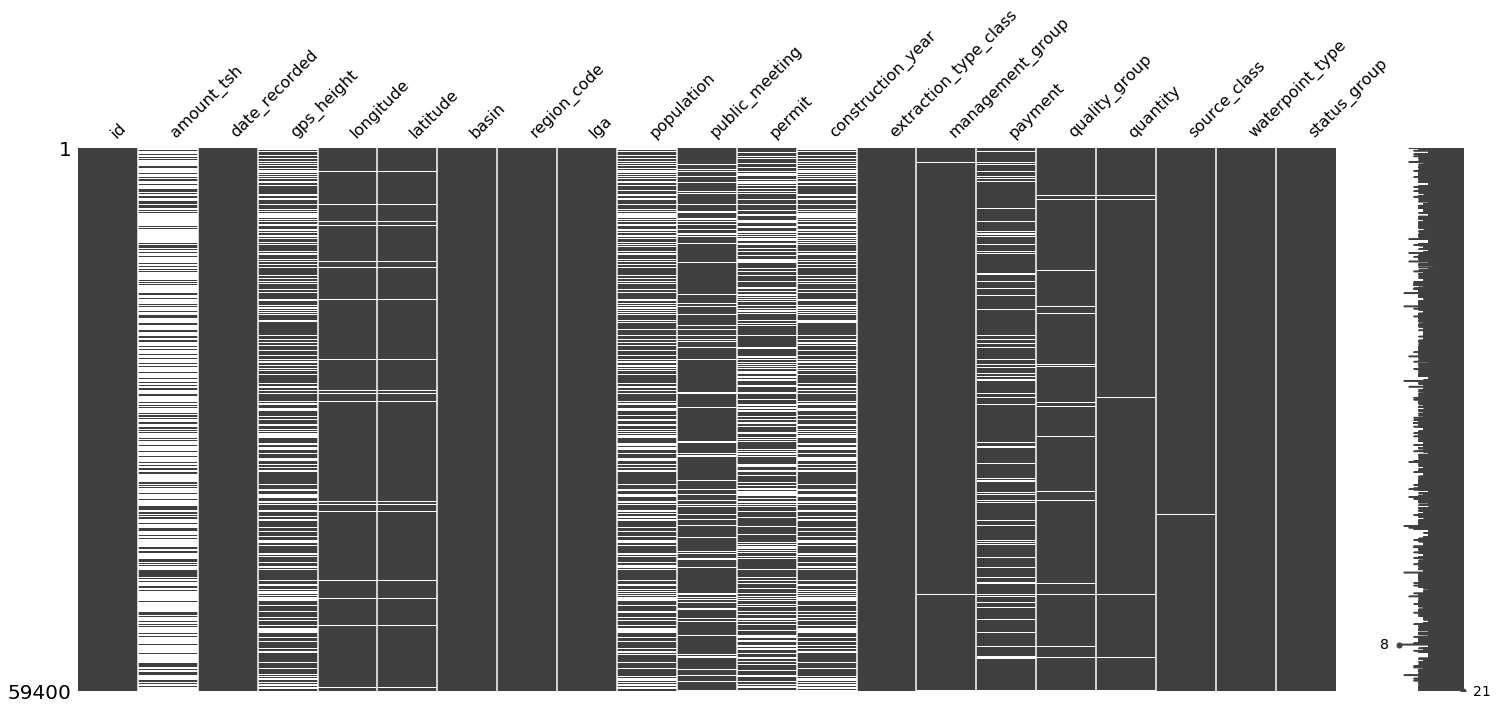

In [41]:
import missingno as msno
msno.matrix(df)

### Encoding and Imputing the variables

**Encoding numeric features with KNNImputer**

In [ ]:
numeric_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 
                    'region_code', 'population', 'public_meeting', 'permit', 'construction_year']

X_numeric = df[numeric_features]

imputer = KNNImputer(n_neighbors=2)
X_numeric = imputer.fit_transform(X_numeric)

X_numeric = pd.DataFrame(X_numeric, columns=numeric_features)

In [ ]:
# Reconstructing the origianl dataframe
df['amount_tsh'] = X_numeric['amount_tsh']
df['gps_height'] = X_numeric['gps_height']
df['longitude'] = X_numeric['longitude']
df['latitude'] = X_numeric['latitude']
df['region_code'] = X_numeric['region_code']
df['population'] = X_numeric['population']
df['public_meeting'] = X_numeric['public_meeting']
df['permit'] = X_numeric['permit']
df['construction_year'] = X_numeric['construction_year']

**Encoding and Imputing categorical features with iterativeimputer**

- Using a label encoding method to deal with nan values so that the categorical features can be interativeimputed

In [43]:
categorical_features = ['basin', 'lga', 'extraction_type_class', 'management_group', 
                        'payment', 'quality_group', 'quantity', 'source_class', 'waterpoint_type']

# Label encoding with a trick to keep nan values
df[categorical_features] = df[categorical_features].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
        ))

X_categorical = df[categorical_features]

imputer = IterativeImputer()
X_categorical = imputer.fit_transform(X_categorical)
X_categorical = pd.DataFrame(X_categorical, columns=categorical_features)

In [ ]:
df['basin'] = X_categorical['basin']
df['lga'] = X_categorical['lga']
df['extraction_type_class'] = X_categorical['extraction_type_class']
df['management_group'] = X_categorical['management_group']
df['payment'] = X_categorical['payment']
df['quality_group'] = X_categorical['quality_group']
df['quantity'] = X_categorical['quantity']
df['source_class'] = X_categorical['source_class']
df['waterpoint_type'] = X_categorical['waterpoint_type']

### Datetime feature engineering

- Encoding cyclical continuous features
- using sin/cosine facet
- sin/cosine bad for decsion trees since the features will be treated as independent

don't drop features untill dealing with modeling. example if doing logistic regression haveing the sin and cosine features coulb be usfull. but with randomforest given the fact the the features will be treated indepentenly it might be less usful.

notes:

df["cos_x"] = np.cos(df["x_norm"])
df["sin_x"] = np.sin(df["x_norm"])

**Modifying date_recorded feature**

In [ ]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True)
df['year_recorded'] = df['date_recorded'].dt.year
df['month_rec'] = df['date_recorded'].dt.month
df['day_rec'] = df['date_recorded'].dt.day

**Normalization and cos/sin feature of month and day**

In [ ]:
days_in_a_month = 31 # can potentially be done better (28, 30, 31)
months_in_a_year = 12

# Normalize
df['norm_day'] = 2 * math.pi * df["day_rec"] / df["day_rec"].max()
df['norm_month'] = 2 * math.pi * df['month_rec'] / df['month_rec'].max()

# Sin
df['sin_day'] = np.sin((df.day_rec-1)*(2*np.pi/days_in_a_month))
df['sin_month'] = np.sin((df.month_rec-1)*(2*np.pi/months_in_a_year))

# Cosine
df['cos_day'] = np.cos((df.day_rec-1)*(2*np.pi/days_in_a_month))
df['cos_month'] = np.cos((df.month_rec-1)*(2*np.pi/months_in_a_year))

**Plotting the new cyclical relationships of day and month**

In [ ]:
df_sample = df.sample(100)


fig = make_subplots(rows=2, cols=2, subplot_titles=("Day", "Month", "Day", "Month"))

# graphing day features (row1, col1)
df_sample = df_sample.sort_values('norm_day').reset_index(drop=True)
fig.add_trace(go.Scatter(x=df_sample.norm_day, y=df_sample.sin_day, name='Sin'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_sample.norm_day, y=df_sample.cos_day, name='Cosine'), row=1, col=1)

# graphing months features (row1, col2)
df_sample = df_sample.sort_values('norm_month').reset_index(drop=True)
fig.add_trace(go.Scatter(x=df_sample.norm_month, y=df_sample.sin_month, name='Sin'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_sample.norm_month, y=df_sample.cos_month, name='Cosine'), row=1, col=2)

# graphing sin and cosine feature relationship
fig.add_trace(go.Scatter(x=df_sample.cos_day, y=df_sample.sin_day, mode="markers"), row=2, col=1)
fig.add_trace(go.Scatter(x=df_sample.cos_month, y=df_sample.sin_month, mode="markers"), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="DateTime Cyclical Sin and Cosine Features")

fig.show()

### Creating a years since contructed Feature

- Turning two features into one
- reduces dimensionality be removing year contructed and year recorded
- given there is only a few years that are in date_recorded this feature becomes much more rich

In [ ]:
df['years_in_service'] = df['year_recorded'] - df['construction_year']

In [ ]:
df.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,lga,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source_class,waterpoint_type,status_group,year_recorded,month_rec,day_rec,norm_day,norm_month,sin_day,sin_month,cos_day,cos_month,years_in_service
0,69572.0,6000.0,2011-03-14,1390.0,34.938093,-9.856322,1.0,11.0,51.0,109.0,1.0,1.0,1999.0,0.0,3.0,2.0,2.0,1.0,0.0,1.0,functional,2011,3,14,2.837568,1.570796,0.485302,8.660254e-01,-0.874347,0.500000,12.0
1,8776.0,612.5,2013-03-06,1399.0,34.698766,-2.147466,4.0,20.0,103.0,280.0,1.0,1.0,2010.0,0.0,3.0,0.0,2.0,2.0,1.0,1.0,functional,2013,3,6,1.216100,1.570796,0.848644,8.660254e-01,0.528964,0.500000,3.0
2,34310.0,25.0,2013-02-25,686.0,37.460664,-3.821329,5.0,21.0,108.0,250.0,1.0,1.0,2009.0,0.0,3.0,4.0,2.0,1.0,1.0,2.0,functional,2013,2,25,5.067085,1.047198,-0.988468,5.000000e-01,0.151428,0.866025,4.0
3,67743.0,1012.5,2013-01-28,263.0,38.486161,-11.155298,7.0,90.0,87.0,58.0,1.0,1.0,1986.0,5.0,3.0,0.0,2.0,0.0,0.0,2.0,non functional,2013,1,28,5.675135,0.523599,-0.724793,0.000000e+00,0.688967,1.000000,27.0
4,19728.0,1500.0,2011-07-13,1173.5,31.130847,-1.825359,4.0,18.0,26.0,425.0,1.0,1.0,1997.0,0.0,1.0,0.0,2.0,3.0,1.0,1.0,functional,2011,7,13,2.634884,3.665191,0.651372,1.224647e-16,-0.758758,-1.000000,14.0


### Dropping Features that are unecessary for modeling

In [ ]:
df.drop(['id'], axis=1, inplace=True)
df.drop('date_recorded', axis=1, inplace=True)
df.drop('construction_year', axis=1, inplace=True)
df.drop('year_recorded', axis=1, inplace=True)
df.drop('month_rec', axis=1, inplace=True)
df.drop('day_rec', axis=1, inplace=True)

### Using SelectKBest to find top features
- should experiment with diffrent statistical tests
- need to find a way to fill in missing data for each feature
- maybe set a threshold for when to use ordinal and onehot encoding. maybe 5 or more categories...
- https://stackoverflow.com/questions/56045435/filling-missing-values-with-values-from-most-similar-row

In [ ]:
features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin',
       'region_code', 'lga', 'population', 'public_meeting', 'permit',
       'extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity', 'source_class', 'waterpoint_type', 'norm_day', 'norm_month',
       'sin_day', 'sin_month', 'cos_day', 'cos_month', 'years_in_service']

X = df[features]

label_enc = LabelEncoder()
y = label_enc.fit_transform(df['status_group'])

In [ ]:
selector = SelectKBest(score_func=f_regression, k=5)

X_train_selected = selector.fit_transform(X, y)

selected_masker = selector.get_support()
all_features = X.columns
selected_feature = all_features[selected_masker]

print('The selected feature: ', selected_feature)

The selected feature:  Index(['extraction_type_class', 'payment', 'quantity', 'waterpoint_type',
       'years_in_service'],
      dtype='object')
